# Plotting Scripts
Run this whole Jupyter to produce the paper plots.

### Initialization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from rdkit import Chem
import os
import sys
import networkx as nx
from tqdm import tqdm

sns.set_theme(style="whitegrid")

## Section 4

In [27]:
def molToGraph(mol):
  graph = nx.Graph()
  for atom in mol.GetAtoms():
    graph.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
  for bond in mol.GetBonds():
    graph.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
  return graph

molecules = []
patterns = []

with open('./data/data.smarts') as f:
  for line in tqdm(f):
    mol = Chem.MolFromSmiles(line.strip())
    graph = molToGraph(mol)
    molecules.append(graph)

with open('./data/query.smarts') as f:
  for line in tqdm(f):
    mol = Chem.MolFromSmarts(line.strip())
    graph = molToGraph(mol)
    patterns.append(graph)


114901it [00:58, 1962.31it/s]
702it [00:00, 11877.23it/s]


### Histogram Nodes Degree

In [28]:
degree_df = pd.DataFrame(columns=['Degree', 'Type'])

query_degrees = []
for graph in molecules:
  for node in graph.nodes:
    query_degrees.append(graph.degree(node))

data_degrees = []
for graph in patterns:
  for node in graph.nodes:
    data_degrees.append(graph.degree(node))

query_df = pd.DataFrame(query_degrees, columns=['Degree'])
query_df['Type'] = 'Pattern'

data_df = pd.DataFrame(data_degrees, columns=['Degree'])
data_df['Type'] = 'Molecule'

degree_df = pd.concat([query_df, data_df])

del query_degrees, data_degrees, query_df, data_df


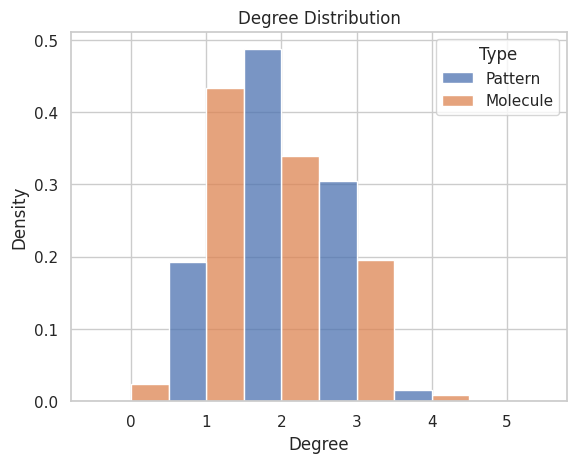

In [29]:
g = sns.histplot(degree_df, x='Degree', hue='Type', discrete=True, common_norm=False, stat='density', multiple='dodge', binwidth=0.7, element='bars')
g.title.set_text('Degree Distribution')